# Analysis of symptoms correlation with symptoms
The objective of this analysis is to correlate the variations of symptoms with the day of the cycle. For all users, cycle length was normalized to a "standard" 28-day cycle, and the mean intensity of symptoms was computed when enough different users (more than 25) logged their symptoms into the app for that day of their cycle.

We observe known patterns of pain and disorders between J1 and J5, and symptoms of pre-menstrual syndroms at the end of the cycle.

To obtain the matching of one user's symptoms with respect to "normal" symptoms, one needs to compute the cosine similarity between user's symptoms vector and the average vector for that day of the cycle. A similarity close to 1 indicates that the symptoms matched what is expected at that time of the cycle, otherwise, it means that symptoms may have other causes, and indicate another disorder if symptoms persist.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
m_symptoms = pd.read_csv('data/clean_symptom.csv')
symptom_cols = ['acne', 'backache', 'bloating', 'cramp', 'diarrhea', 'dizzy',
                'headache', 'mood', 'nausea', 'sore']
reduced_symptoms = ['acne', 'backache', 'bloating', 'cramp', 
                'headache', 'mood', 'sore']

In [3]:
m_symptoms = m_symptoms.assign(percent_cycle=m_symptoms.day_of_cycle/m_symptoms.cycle_length)
m_symptoms = m_symptoms.assign(normalized_day_cycle=pd.Categorical(np.round(m_symptoms.percent_cycle*28)+1, ordered=True, categories=range(1, 29)))

In [4]:
m_symptoms = m_symptoms.assign(nb_row_user = m_symptoms.user_id.map(m_symptoms.user_id.value_counts()))
m_symptoms = m_symptoms.assign(nb_cycle_user = m_symptoms.user_id.map(m_symptoms.groupby('user_id').start_date.nunique()))


In [5]:
m_symptoms[symptom_cols] = m_symptoms[symptom_cols].replace({0:np.nan})

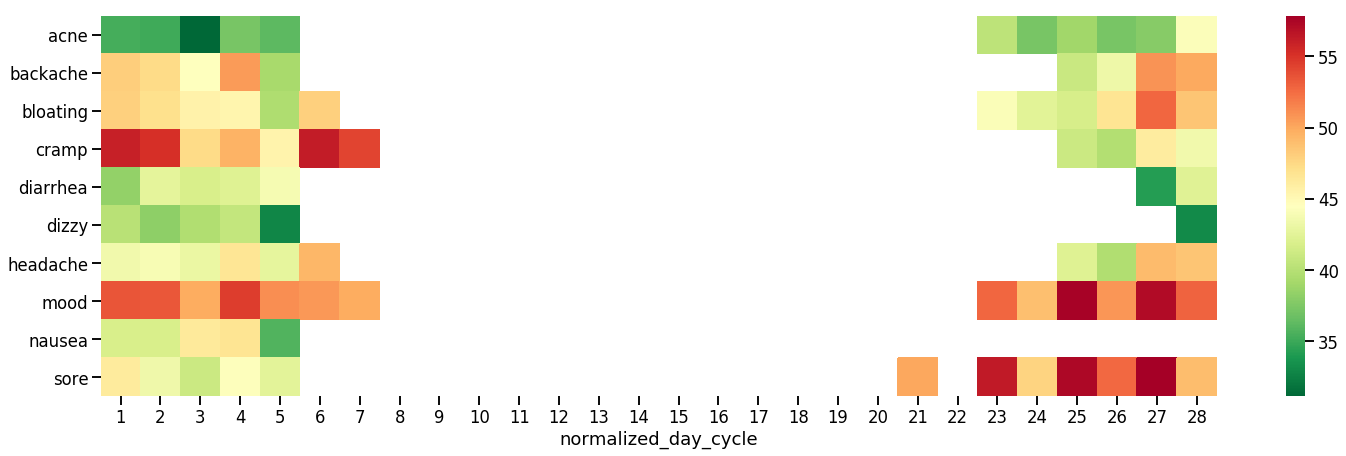

In [6]:
filling_nb = m_symptoms[(m_symptoms.nb_cycle_user>=3)].groupby(['user_id', 'normalized_day_cycle']).mean()[symptom_cols].groupby('normalized_day_cycle').count()[symptom_cols].T

plt.figure(figsize=(25,7))
sns.set_context("talk", font_scale=1)
mean_data = m_symptoms[(m_symptoms.nb_cycle_user>=3)].groupby(['user_id', 'normalized_day_cycle']).mean()[symptom_cols].groupby('normalized_day_cycle').mean()[symptom_cols].T
mean_data[filling_nb<25] = np.nan
sns.heatmap(mean_data, cmap='RdYlGn_r', fmt='g')


In [7]:
mean_table = m_symptoms[(m_symptoms.nb_cycle_user>=3)].groupby(['user_id', 'normalized_day_cycle']).mean()[symptom_cols].groupby('normalized_day_cycle').mean()[symptom_cols]


In [8]:
mean_table.columns = ['{}_m'.format(c) for c in mean_table.columns]

In [9]:
m_symptoms = m_symptoms.assign(normalized_day_cycle=m_symptoms.normalized_day_cycle.astype(float))
m_symptoms_enriched = pd.merge(m_symptoms, mean_table, left_on='normalized_day_cycle', right_index=True)
                                                 
                                                 